# About Dataset

### Problem Definition

The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

### Content

This dataset contains the unemployment rate of all the states in India

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = percentage of people employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively 
participating in the labour force by the
total number of people eligible to participate in the labor force

force


### DataSet 
  https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
  
### Objective of Analysis: 

The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on India's job market. The dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).
  
** In this we are going to take the following approach:***

1. Data

2. Data Preprocessing

3. Model Selection

4. Model Training

5. Model Evaluation

6. Predictions  

In [146]:
# Importing the all Tools as we needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import sklearn
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from IPython.display import HTML

## Load the Data

In [147]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv",
                low_memory=False)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [148]:
# Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [149]:
#update the column names to get better understanding
df.columns=["State","Date","Frequency","Estimated unemployment rate","Estimated employed","Estimated labour participation rate","Region","Longitude","Latitude"]
df

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [150]:
df.head()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [151]:
df.shape

(267, 9)

In [152]:
df.describe()

,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [153]:
# Check wether Nan Values are present
df.isna().sum()

State                                  0
Date                                   0
Frequency                              0
Estimated unemployment rate            0
Estimated employed                     0
Estimated labour participation rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [154]:
df.State.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [155]:
df.Date[:100]

0      31-01-2020
1      29-02-2020
2      31-03-2020
3      30-04-2020
4      31-05-2020
         ...     
95     31-07-2020
96     31-08-2020
97     30-09-2020
98     31-10-2020
99     31-01-2020
Name: Date, Length: 100, dtype: object

In [156]:
df.Date.dtype

dtype('O')

In [157]:
# Converting "Date" column to Datetime format
df['Date']= pd.to_datetime(df['Date'],dayfirst=True)

In [158]:
df["Date"]

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name: Date, Length: 267, dtype: datetime64[ns]

In [159]:
df

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855


In [160]:
# Lets convert objects in Categorical datatype
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [161]:
# Extract month and month abbreviation
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [162]:
# Drop the original 'Month' column
df.drop(columns='Month', inplace=True)

In [163]:
df.head()

,State,Date,Frequency,Estimated unemployment rate,Estimated employed,Estimated labour participation rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


## Exploratory Data Analysis

In [164]:
df_stat = df[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]
print(round(df_stat.describe().T, 2))

                                     count         mean          std  \
Estimated unemployment rate          267.0        12.24        10.80   
Estimated employed                   267.0  13962105.72  13366318.36   
Estimated labour participation rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated unemployment rate               0.50        4.84        9.65   
Estimated employed                   117542.00  2838930.50  9732417.00   
Estimated labour participation rate      16.77       37.26       40.39   

                                             75%          max  
Estimated unemployment rate                16.76        75.85  
Estimated employed                   21878686.00  59433759.00  
Estimated labour participation rate        44.06        69.69  


In [165]:
region_stats = df.groupby(['Region'])[['Estimated unemployment rate', 'Estimated employed', 
                                       'Estimated labour participation rate']].mean().reset_index()
print(round(region_stats, 2))

      Region  Estimated unemployment rate  Estimated employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated labour participation rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


## Correlation Matrix

<Axes: >

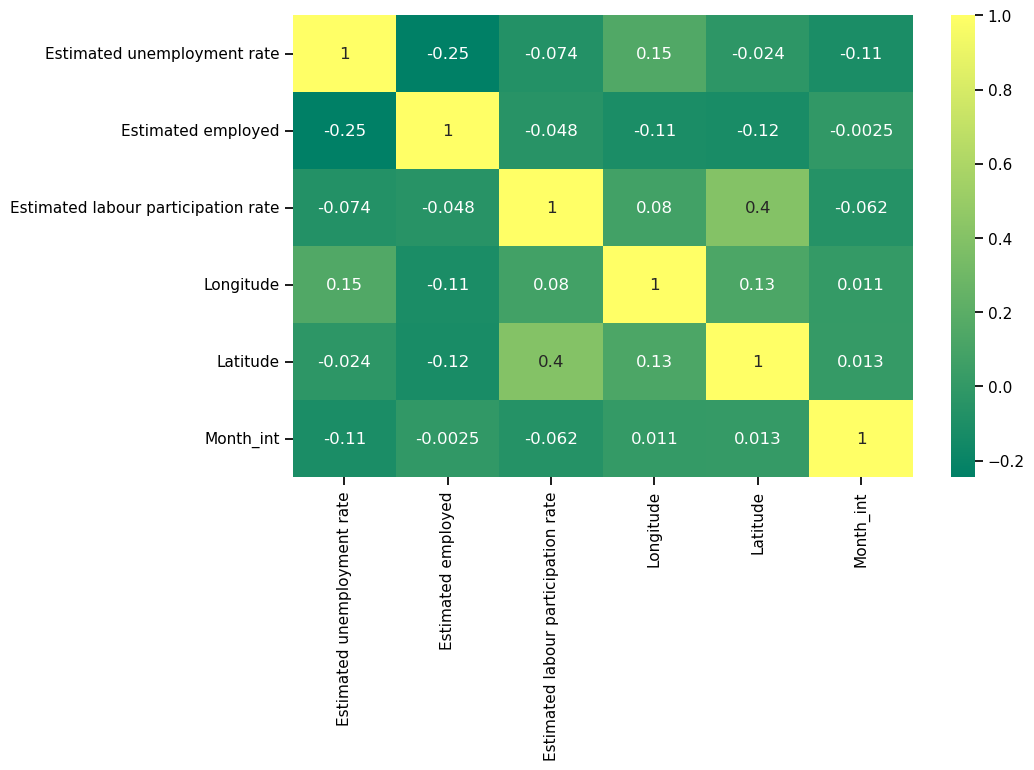

In [166]:
# Correlation Heatmap

heat_maps = df[['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate', 'Longitude', 'Latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

In [167]:
# Let's get the unempoyment rate by states using Box Plot
import plotly.express as px
fig = px.box(df, x='State', y='Estimated unemployment rate', color='State', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [168]:
# Scatter matrix

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate'],
                        color='Region')
fig.show()

In [169]:
# Let's get understand about Average unemployment rate in each state using Bar Plot
plot_ump = df[['Estimated unemployment rate', 'State']]
df_unemp = plot_ump.groupby('State').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated unemployment rate')
fig = px.bar(df_unemp, x='State', y='Estimated unemployment rate', color='State',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [170]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = df[['State', 'Region', 'Estimated unemployment rate', 'Estimated employed', 'Estimated labour participation rate']]
unemplo = unemplo_df.groupby(['Region', 'State'])['Estimated unemployment rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'State'], values='Estimated unemployment rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

#### Unemployment fro Jan 2020 - Oct 2020 

In [171]:
fig = px.bar(df, x='Region', y='Estimated unemployment rate', animation_frame='Month_name', color='State',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

***Impact of Lockdown on States Estimated Employed***

On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

In [172]:
fig = px.scatter_geo(df,'Longitude', 'Latitude', color="Region",
                     hover_name="State", size="Estimated unemployment rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [173]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('State')['Estimated unemployment rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('State')['Estimated unemployment rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated unemployment rate']
g_lock.columns = ['State','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head(2)

,State,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [174]:
# percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')

In [175]:
# percentage change in unemployment after lockdown
fig = px.bar(plot_per, x='State',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

## By Observing above Bar Graph

***Most Impacted States/Union Territories

1. Puducherry

2. Jharkhand

3. Bihar

4. Haryana

5. Tripura

In [176]:
#Let's sort the values based on the impact
def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [177]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [178]:
fig = px.bar(plot_per, y='State',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)
fig.show()